# Project: Wrangling and Analyze Data

In [48]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import json
import os
import requests
import string
import tweepy
from IPython.display import Image
from IPython.core.display import HTML 
from tweepy import OAuthHandler
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [49]:
df= pd.read_csv('twitter-archive-enhanced.csv')
#check the dataframe
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [50]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)
with open ('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

In [51]:
image_df=pd.read_csv('image_predictions.tsv', sep='\t')
#check the image prediction dataframe
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [33]:
consumer_key = 'XXX'
consumer_secret = 'XXX'
access_token = 'XXX'
access_secret = 'XXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth,
                parser=tweepy.parsers.JSONParser(),
                wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [35]:
# Writing JSON data of all the tweets in twitter_archive to tweet_json.txt
start_time=time.time()

with open ('tweet_json.txt','w') as file:
    for twitter_id in df['tweet_id']:
        try:
            tweet = api.get_status(twitter_id, tweet_mode='extended')
            file.write(json.dumps(tweet)+'\n') #writting one tweet per line
        except Exception as e:
                print(str(twitter_id) + " : " + str(e))

end_time=time.time()
print("Whole process finished in {} seconds".format(end_time-start_time))

888202515573088257 : [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 : [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 : [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 : [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 : [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 : [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 : [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 : [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856 : [{'code': 34, 'message': 'Sorry, that page does not exist.'}]
851953902622658560 : [{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816 : [{'code': 34, 'message': 'Sorry, that page does not exist.'}]
845459076796616705 : [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 : [{'

In [52]:
#Storing the selected key and values from JSON to a dataframe
selected_attr=[]

with open('tweet_json.txt','r') as json_file:
    for line in json_file:
        json_data=json.loads(line)
        selected_attr.append({'tweet_id': json_data['id'],
                             'favorite_count': json_data['favorite_count'],
                             'retweet_count': json_data['retweet_count']})
        
tweet_json=pd.DataFrame(selected_attr,columns=['tweet_id','favorite_count','retweet_count'])

In [53]:
#check the dataframe read from Json file
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### - Acess twitter-archive0enhanced dataframe

In [54]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [29]:
# Check dogs' name
df.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Cooper          11
Oliver          11
Lola            10
Tucker          10
Penny           10
Bo               9
Winston          9
Sadie            8
the              8
Toby             7
Buddy            7
Daisy            7
Bailey           7
an               7
Oscar            6
Jax              6
Stanley          6
Jack             6
Bella            6
Scout            6
Dave             6
Milo             6
Rusty            6
Leo              6
Koda             6
Chester          5
              ... 
Combo            1
Pippin           1
Lulu             1
Grizz            1
Kanu             1
Grizzie          1
Swagger          1
Kayla            1
Obi              1
Damon            1
Furzey           1
Mary             1
Poppy            1
Tebow            1
Thor             1
Nigel            1
Reptar           1
Oddie            1
Major            1
Harry            1
Jeremy           1
infuriating 

In [30]:
# Check if name is always captured
df[['text', 'name']].sample(20)

,text,name
461,Say hello to Eugene &amp; Patti Melt. No matte...,Eugene
2096,Say hello to Gin &amp; Tonic. They're having a...,Gin
331,This is Rhino. He arrived at a shelter with an...,Rhino
2003,This is Buddy. He's photogenic af. Loves to se...,Buddy
1293,Everybody stop what you're doing and watch thi...,None
1271,This is Billy. He sensed a squirrel. 8/10 damn...,Billy
2218,This is a Birmingham Quagmire named Chuk. Love...,a
1696,This is Champ. He's being sacrificed to the Az...,Champ
1261,This is Lacy. She's tipping her hat to you. Da...,Lacy
192,I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...,None


In [31]:
# Check ratings
df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [32]:
df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

#### Issues found with twitter-archive0enhanced dataset
* Missing data in columns including "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp".
* Retweets are included in the dataset.
* Source columns have HTML tags.
* Timestamp and retweeted_status_timestamp is an object.
* Dogs name have 'None', or 'a', or 'an.' and some only has lower case as names.
* Multiple dog stages occurs such as 'doggo puppo', 'doggo pupper', 'doggo floofer'.
* The ratings for dogs are nor standardized.

### - Access tweet image prediction dataframe

In [56]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [57]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Issues found with image prediction dataframe
* This data set is part of the same observational unit as the data in the previous dataframe(df)
* Dog breeds are not consistently in p1,p2,p3 columns

### - Access twitter-json dataframe

In [58]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,34196,7096
1,892177421306343426,29654,5345
2,891815181378084864,22329,3519
3,891689557279858688,37371,7297
4,891327558926688256,35714,7836


In [59]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [60]:
#sample
tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count
1585,685315239903100929,3073,956
105,871166179821445120,0,4946
1781,676821958043033607,20985,14003
1208,712438159032893441,4975,1441
667,788039637453406209,5868,1246
1825,675534494439489536,1679,369
286,836648853927522308,0,512
1380,699072405256409088,2764,1094
898,755110668769038337,20009,10320
1391,698342080612007937,2109,885


#### Issues found with twitter-json dataframe
* Retweet and favorite information is not available for all tweets and cannot be retrieved 
* This data set is part of the same observational unit as the data in the previous dataframe (df)

## By organizing the previous found issues, here are the quality issues and tidiness issues.

### Quality issues

#### Twitter Archive table (df)
1. Missing data in columns including "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp".

2. Retweets are included in the dataset.

3. Source columns have HTML tags.

4. Timestamp and retweeted_status_timestamp is an object.

5. Dogs name have 'None', or 'a', or 'an.' and some only has lower case as names.

6. Multiple dog stages occurs such as 'doggo puppo', 'doggo pupper', 'doggo floofer'.

7. The ratings for dogs are nor standardized.

#### Tweet image predictions (image_df):

8. Dog breeds are not consistently in p1,p2,p3 columns.

#### Tweet-json dataframe (tweet_json):

9. Retweet and favorite information is not available for all tweets and cannot be retrieved.

### Tidiness issues
#### Twitter Archive table (df)
1. There are multiple columns containing the same type of data, e.g. doggo, floofer, pupper and puppo all contain dog types.

#### Tweet image predictions (image_df):
2. This dataset is part of the same observational unit as the data in the previous dataframe(df).

#### Tweet-json dataframe (tweet_json):
3. This dataset is part of the same observational unit as the data in the previous dataframe (df).

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [67]:
# Make copies of original pieces of data
df_clean = df.copy()
image_df_clean = image_df.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1: 
In image_df, dog breeds are not consistently in p1,p2,p3 columns.

#### Define: 
Creates a predicted dog breed column, based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements.

#### Code

In [68]:
image_df_clean['breed_prediction'] = [df['p1'] if df['p1_dog'] == True and df['p1_conf'] > 0.2 
                     else df['p2'] if df['p2_dog'] == True and df['p2_conf'] > 0.2
                     else df['p3'] if df['p3_dog'] == True and df['p3_conf'] > 0.2
                     else np.nan for index, df in image_df_clean.iterrows()]

## Drop unnecessary columns
image_df_clean.drop(['p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf'], axis = 1, inplace=True)

#### Test

In [69]:
image_df_clean.sample()

,tweet_id,jpg_url,img_num,breed_prediction
1282,750383411068534784,https://pbs.twimg.com/media/CmnluwbXEAAqnkw.jpg,1,Border_collie


### Issue #2:
In Twitter Archive table (df), multiple dog stages occurs such as 'doggo puppo', 'doggo pupper', 'doggo floofer'. (Quality issue)

There are multiple columns containing the same type of data, e.g. doggo, floofer, pupper and puppo all contain dog types. (Tidiness issue)

#### Define
Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer' ascolumn name ' type ' with the categorical dtype.

#### Code

In [70]:
df_clean.doggo.replace(np.NaN, '', inplace=True)
df_clean.floofer.replace(np.NaN, '', inplace=True)
df_clean.pupper.replace(np.NaN, '', inplace=True)
df_clean.puppo.replace(np.NaN, '', inplace=True)
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

# Convert the stage in df_clean into categorical dtype
df_clean['stage'] = df_clean['stage'].astype('category')

# drop 'doggo', 'floofer', 'pupper', 'puppo' columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
df_clean.stage.replace('', np.nan, inplace=True)

#### Test

In [71]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         380 non-null category
dtypes: category(1), float64(4), int64(3), object(6)
memory usage: 242.0+ KB


In [89]:
df_clean.stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
                    0
Name: stage, dtype: int64

### Issue #3:
Dataset image_df and tweet_json are part of the same observational unit as the data in the previous dataframe(df). (Tidiness issue)

#### Define
Merge the copied df_clean, image_df_clean, and tweet_json_clean dataframes

#### Code

In [78]:
from functools import reduce
data = [df_clean, image_df_clean, tweet_json_clean]
main_df = reduce(lambda left, right:  pd.merge(left, right,on = 'tweet_id'), data)

#### Test

In [81]:
#Marge DataFrame
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 19 columns):
tweet_id                      2057 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2057 non-null object
source                        2057 non-null object
text                          2057 non-null object
retweeted_status_id           71 non-null float64
retweeted_status_user_id      71 non-null float64
retweeted_status_timestamp    71 non-null object
expanded_urls                 2057 non-null object
rating_numerator              2057 non-null int64
rating_denominator            2057 non-null int64
name                          2057 non-null object
stage                         318 non-null category
jpg_url                       2057 non-null object
img_num                       2057 non-null int64
breed_prediction              1459 non-null object
favorite_count                2057 

### Issue #4:
Dogs name have 'None', or 'a', or 'an.' and some only has lower case as names.

#### Define
Replace 'a', 'an', 'the', 'None' and other lower case words with NaN in name column.

#### Code

In [84]:
main_df['name'] = main_df['name'].replace(main_df[main_df.name.str.islower()].name.unique(), np.nan)
main_df['name'] = main_df['name'].replace('None', np.nan)

In [85]:
main_df['name'].dropna()

0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
6              Jax
8             Zoey
9           Cassie
10            Koda
11           Bruno
13             Ted
14          Stuart
15          Oliver
16             Jim
17            Zeke
18         Ralphus
19          Gerald
20         Jeffrey
22          Canela
25            Maya
26          Mingus
27           Derek
28          Roscoe
29         Waffles
30           Jimbo
31          Maisey
32           Lilly
34            Earl
35            Lola
36           Kevin
           ...    
1970          Dook
1972          Hall
1973      Philippe
1976         Reese
1977       Cupcake
1981         Biden
1982          Fwed
1984     Genevieve
1985        Joshwa
1988       Timison
1991      Clarence
1992       Kenneth
1993       Churlie
1994       Bradlay
1995         Pipsy
1997          Gabe
1998         Clybe
1999          Dave
2001          Keet
2003        Klevin
2004         Carll
2009        

#### Test

In [91]:
main_df.name.value_counts()

Oliver      10
Penny       10
Cooper      10
Tucker      10
Charlie     10
Lucy         9
Winston      8
Lola         8
Bo           8
Sadie        8
Daisy        7
Toby         7
Rusty        6
Dave         6
Jax          6
Scout        6
Milo         6
Bella        6
Bailey       6
Stanley      6
Koda         6
Chester      5
Larry        5
Buddy        5
Leo          5
Oscar        5
Alfie        5
Louis        5
Chip         4
Oakley       4
            ..
Tessa        1
Murphy       1
Rose         1
Oreo         1
Dunkin       1
Pumpkin      1
Strider      1
Cal          1
Thor         1
Luther       1
Eugene       1
Cilantro     1
Kayla        1
Buddah       1
Damon        1
Mary         1
Poppy        1
Tebow        1
Nigel        1
Robin        1
Reptar       1
Tommy        1
Leela        1
Obi          1
Major        1
Jeremy       1
Tycho        1
Bode         1
Vixen        1
Cheryl       1
Name: name, Length: 911, dtype: int64

### Issue #4:
Retweet information is not available for all tweets and cannot be retrieved, and retweets are included in the dataset.

#### Define
Delete rows which contains retweets.

#### Code

In [95]:
main_df = main_df.drop(main_df[(main_df['in_reply_to_status_id'].isnull() == False) | (main_df['retweeted_status_id'].isnull() == False)].index)

#### Test

In [97]:
main_df.shape

(1963, 19)

In [98]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2056
Data columns (total 19 columns):
tweet_id                      1963 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1963 non-null object
source                        1963 non-null object
text                          1963 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1963 non-null object
rating_numerator              1963 non-null int64
rating_denominator            1963 non-null int64
name                          1342 non-null object
stage                         302 non-null category
jpg_url                       1963 non-null object
img_num                       1963 non-null int64
breed_prediction              1394 non-null object
favorite_count                1963 non-n

### Issue #5:
Missing data in columns including "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp".

#### Define
Remove columns including "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp".

#### Code

In [101]:
# drop the reply status and retweet status columns
main_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [108]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2056
Data columns (total 14 columns):
tweet_id              1963 non-null int64
timestamp             1963 non-null datetime64[ns]
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1342 non-null object
stage                 302 non-null category
jpg_url               1963 non-null object
img_num               1963 non-null int64
breed_prediction      1394 non-null object
favorite_count        1963 non-null int64
retweet_count         1963 non-null int64
dtypes: category(1), datetime64[ns](1), int64(6), object(6)
memory usage: 217.0+ KB


### Issue #6:
Timestamp and retweeted_status_timestamp is an object.

#### Define
Change the timestamp to correct datetime format.

#### Code

In [106]:
main_df['timestamp'] = pd.to_datetime(main_df['timestamp'], format='%Y-%m-%d %H:%M:%S')

#### Test

In [109]:
main_df['timestamp'].sample(5)

996    2016-03-30 15:34:51
30     2017-07-14 22:10:11
2042   2015-11-16 03:22:39
1189   2016-02-11 01:42:02
1344   2016-01-08 05:00:14
Name: timestamp, dtype: datetime64[ns]

In [110]:
main_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,breed_prediction,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,34196,7096
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,29654,5345
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,22329,3519
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,37371,7297
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,35714,7836


#### Issue #7:
Source columns have HTML tags.

#### Define
Removing HTML tags from source column

#### Code

In [112]:
ref = main_df["source"].str.split('"', expand = True)
main_df["source"] = ref[1]

#### Test

In [113]:
main_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,breed_prediction,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,34196,7096
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,29654,5345
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,22329,3519
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,37371,7297
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,35714,7836


### Issue #8:
The ratings for dogs are nor standardized.

#### Define
Standardize the ratings for dogs

#### Code

In [114]:
ratings = main_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

main_df.rating_numerator = ratings
main_df['rating_numerator'] = main_df['rating_numerator'].astype('float64')

# standardizing to a denominator of 10 for groups of dogs:

rating_num = [int(round(num/(denom/10)))  if denom != 10 and num/denom <= 2 
                           else num for num, denom in zip(main_df['rating_numerator'], main_df['rating_denominator'])]
rating_denom = [10 if denom != 10 and num/denom <= 2
                             else denom for num, denom in zip(main_df['rating_numerator'], main_df['rating_denominator'])]
main_df['rating_numerator'] = rating_num
main_df['rating_denominator'] = rating_denom

main_df = main_df.drop(main_df[((main_df['rating_denominator'] != 10) | (main_df['rating_numerator'] > 20))].index)

#### Test

In [117]:
main_df['rating_numerator'].unique()

array([ 13.  ,  12.  ,  14.  ,  13.5 ,  11.  ,   6.  ,  10.  ,   0.  ,
         9.75,   5.  ,  11.27,   3.  ,   7.  ,   8.  ,   9.  ,   4.  ,
         2.  ,  11.26,   1.  ])

In [118]:
main_df['rating_denominator'].unique()

array([10])

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [119]:
main_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [123]:
new_df = pd.read_csv('twitter_archive_master.csv')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 14 columns):
tweet_id              1960 non-null int64
timestamp             1960 non-null object
source                1960 non-null object
text                  1960 non-null object
expanded_urls         1960 non-null object
rating_numerator      1960 non-null float64
rating_denominator    1960 non-null int64
name                  1340 non-null object
stage                 302 non-null object
jpg_url               1960 non-null object
img_num               1960 non-null int64
breed_prediction      1393 non-null object
favorite_count        1960 non-null int64
retweet_count         1960 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 214.5+ KB


In [130]:
# Top 10 frequent breeds for dogs in the provided data
new_df['breed_prediction'].value_counts()[0:10].sort_values(ascending=False)

golden_retriever      137
Labrador_retriever     90
Pembroke               88
Chihuahua              74
pug                    53
chow                   39
Samoyed                39
Pomeranian             37
toy_poodle             36
malamute               29
Name: breed_prediction, dtype: int64

In [131]:
# Top 5 frequent names for dogs in the provided data
new_df['name'].value_counts()[0:5].sort_values(ascending=False)

Oliver     10
Charlie    10
Cooper     10
Tucker      9
Lucy        9
Name: name, dtype: int64

In [132]:
# The most frequent stage for dogs in the provided data
new_df['stage'].value_counts()[0:1].sort_values(ascending=False)

pupper    201
Name: stage, dtype: int64

### Insights:

1. From the provided data, Top 10 frequent breeds for dogs are: 
golden_retriever, labrador_retriever， pembroke, chihuahua, pug,chow, Samoyed, Pomeranian, toy_poodle, and malamute.

2. From the provided data, Top 5 names for dogs are:
Oliver, Charlie, Cooper, Tucker, and Lucy.

3. From the provided data, the most frequent stage for dogs is pupper.

### Visualization

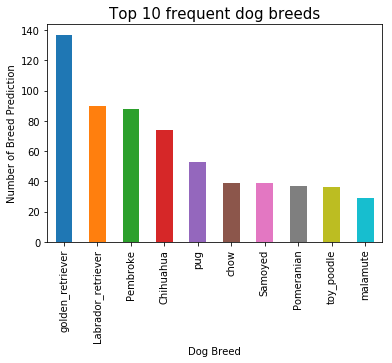

In [135]:
# Top 10 frequent frequent breeds for dogs
new_df['breed_prediction'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Breed Prediction')
plt.title('Top 10 frequent dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.plot();